### Questions posed during EDA

What is the distribution of the target variable?

Are there any missing values?

What are the different ranges of values for the features? do we need to standardize/normalize?

What datatypes are we dealing with?

Which features, if any, can be excluded? Looking at correlation and multicollinearity 

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

df = pd.read_csv("train.csv")

df.head(50)

,ID,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,96253,Seu Jorge,"Musicas para Churrasco, Vol.1 (Ao Vivo) (Delux...",Carolina (Ao Vivo),358733,False,0.641,0.880,11,-6.401,0,0.0604,0.151000,0.000761,0.6110,0.4230,93.000,4,samba,41
1,70417,Chyi Chin,"""1"" (壹)",大約在冬季,231520,False,0.668,0.361,5,-9.710,0,0.0353,0.795000,0.000000,0.2460,0.4320,73.919,3,mandopop,52
2,66688,Babyboomboom,English and French,"Heads, Shoulders, Knees and Toes (Tête, Epaule...",98386,False,0.786,0.225,9,-16.516,1,0.5730,0.679000,0.000000,0.2010,0.6580,110.066,4,kids,11
3,51391,Sidhu Moose Wala;DIVINE,Moosetape,Moosedrilla (feat. DIVINE),232173,False,0.709,0.829,0,-5.817,1,0.2450,0.069800,0.000000,0.5610,0.6540,137.954,4,hip-hop,61
4,95123,Rumbavana,Pa Que Lo Goces Con Ganas,El Capitolio,360320,False,0.786,0.702,0,-6.742,1,0.0456,0.511000,0.000000,0.1200,0.6960,104.030,4,salsa,37
5,104981,Calero LDN;BOXINBOX,Rozando el cielo,Tu veneno,213000,True,0.715,0.758,0,-6.847,0,0.0579,0.449000,0.000000,0.1030,0.7640,149.988,4,spanish,26
6,82811,The Jayhawks,Rainy Day Music,Save It For A Rainy Day,187733,False,0.632,0.757,11,-3.536,1,0.0267,0.278000,0.000000,0.3580,0.7180,124.805,4,power-pop,51
7,78503,le Shuuk;Xillions,Goodbye (feat. Xillions),Goodbye (feat. Xillions),155492,False,0.689,0.801,1,-4.501,0,0.1220,0.035900,0.000547,0.0743,0.5140,142.062,4,party,55
8,57759,Rohan Kamath,Paani,Paani,193764,False,0.600,0.408,3,-9.873,1,0.0248,0.838000,0.000000,0.1070,0.2650,84.984,4,indie,42
9,29901,NAZAAR,Guru,Guru,224000,False,0.522,0.914,2,-1.627,1,0.0865,0.330000,0.095600,0.2270,0.0762,150.074,4,dubstep,26


In [25]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91199 entries, 0 to 91198
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                91199 non-null  int64  
 1   artists           91199 non-null  object 
 2   album_name        91199 non-null  object 
 3   track_name        91199 non-null  object 
 4   duration_ms       91199 non-null  int64  
 5   explicit          91199 non-null  bool   
 6   danceability      91199 non-null  float64
 7   energy            91199 non-null  float64
 8   key               91199 non-null  int64  
 9   loudness          91199 non-null  float64
 10  mode              91199 non-null  int64  
 11  speechiness       91199 non-null  float64
 12  acousticness      91199 non-null  float64
 13  instrumentalness  91199 non-null  float64
 14  liveness          91199 non-null  float64
 15  valence           91199 non-null  float64
 16  tempo             91199 non-null  float6

,ID,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,91199.000000,9.119900e+04,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000,91199.000000
mean,57139.926140,2.280353e+05,0.566913,0.640850,5.309554,-8.269501,0.637759,0.084752,0.315576,0.156965,0.213367,0.473805,122.120902,3.902707,33.298644
std,32958.081692,1.080505e+05,0.173321,0.251657,3.558856,5.042269,0.480651,0.105707,0.332568,0.310527,0.190603,0.258998,29.979550,0.434682,22.312524
min,0.000000,1.338600e+04,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28511.500000,1.741655e+05,0.456000,0.471000,2.000000,-10.024000,0.000000,0.035900,0.017100,0.000000,0.097900,0.260000,99.093500,4.000000,17.000000
50%,57235.000000,2.128880e+05,0.580000,0.684000,5.000000,-7.016000,1.000000,0.049000,0.170000,0.000041,0.132000,0.464000,122.012000,4.000000,35.000000
75%,85710.500000,2.614415e+05,0.695000,0.853000,8.000000,-5.001000,1.000000,0.084600,0.598000,0.050000,0.273000,0.683000,140.059500,4.000000,50.000000
max,113999.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000


### Findings

We find that there are 91199 rows and 20 columns including the ID column. 

We can see that five features are categorical (artist, album_name, track_name, explicit, track_genre).

Our target variable is on a continuous range between 0 and 100

There's 0 missing values

The scale of the features vary quite a bit. Where a few values are approx between 0 - 1 such as liveness, instrumentalness, acuosticness, speechiness, mode, energy, danceability. 

Key and time_signature seems to be categorical, and mode seems binary. 


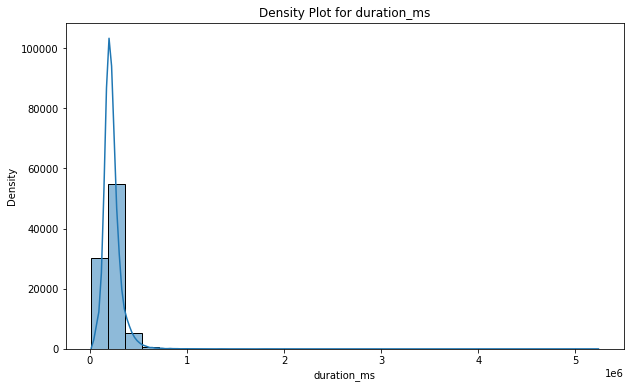

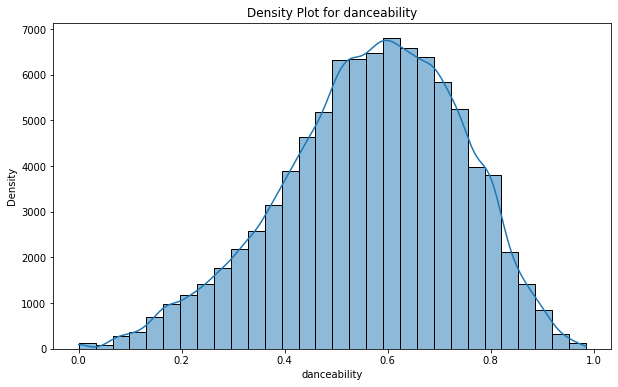

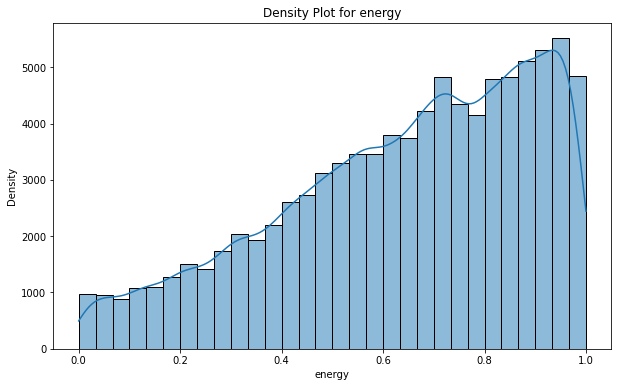

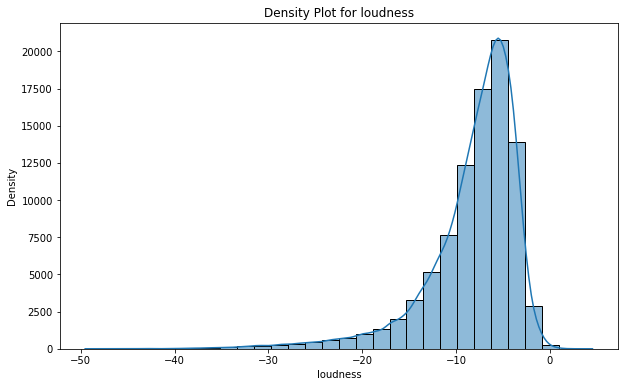

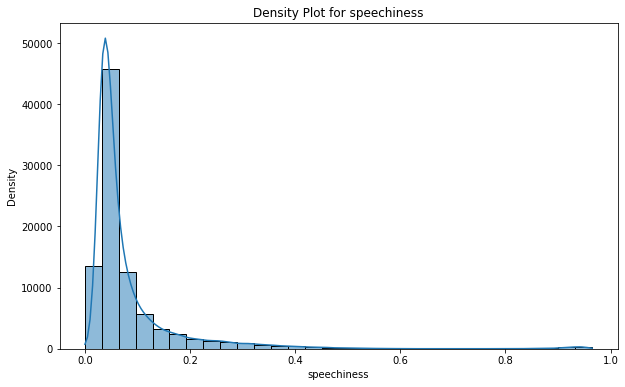

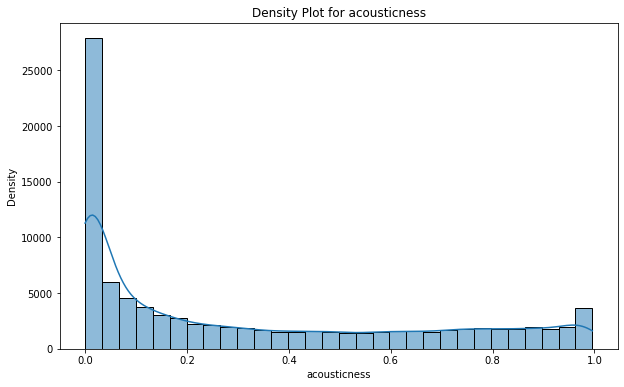

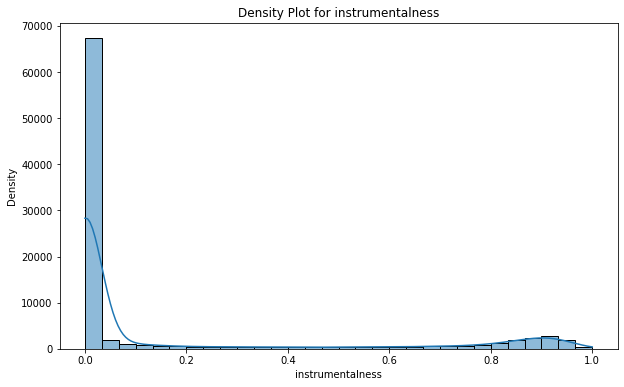

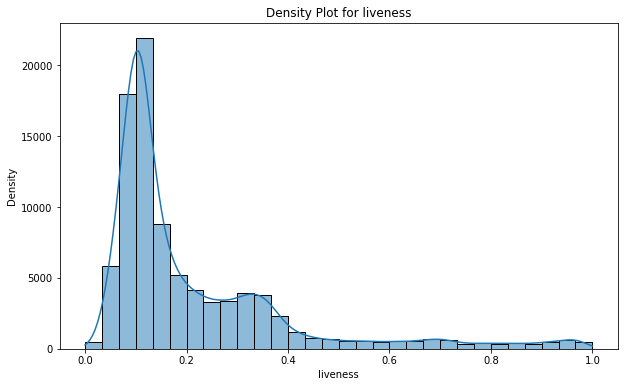

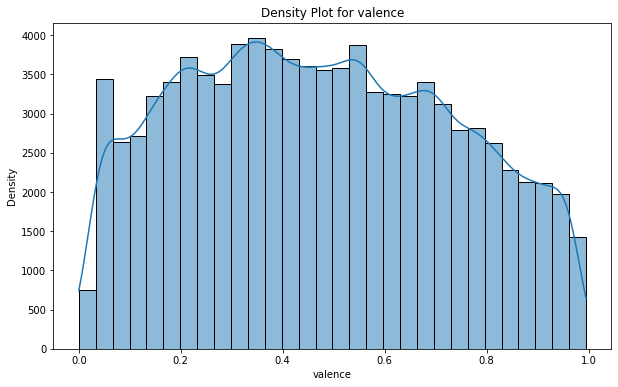

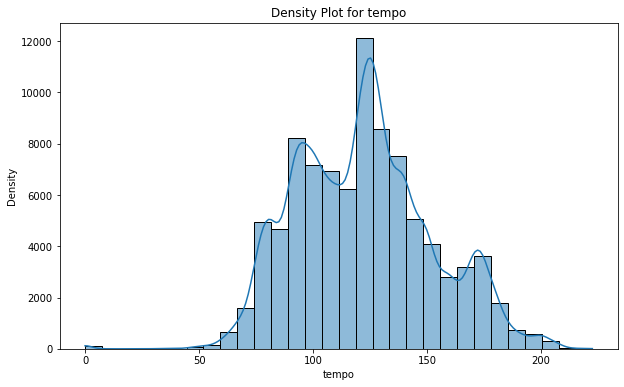

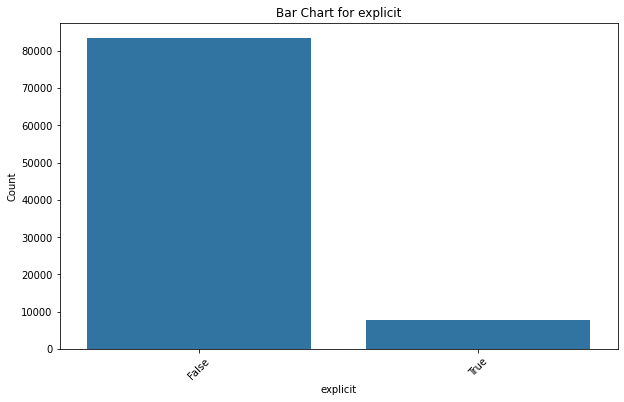

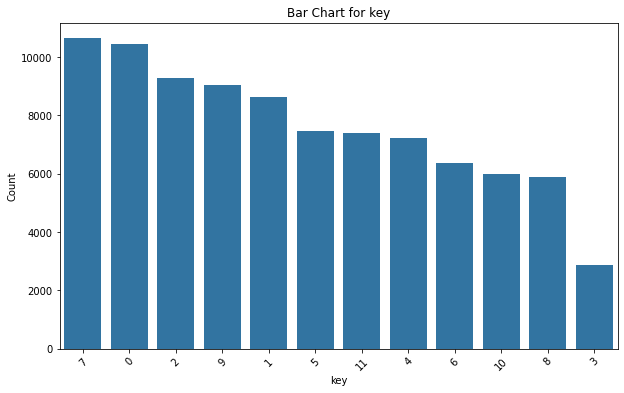

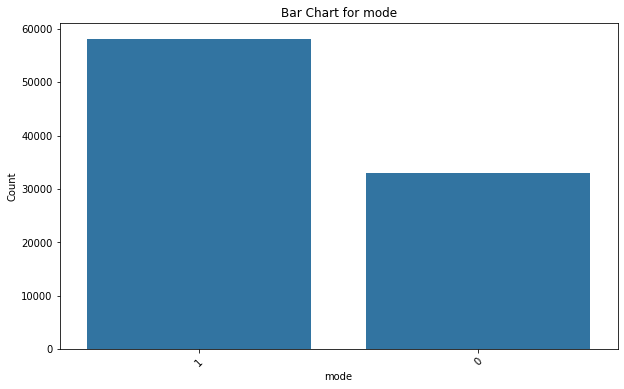

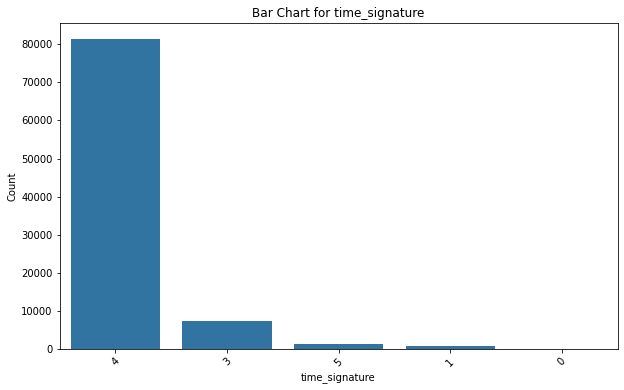

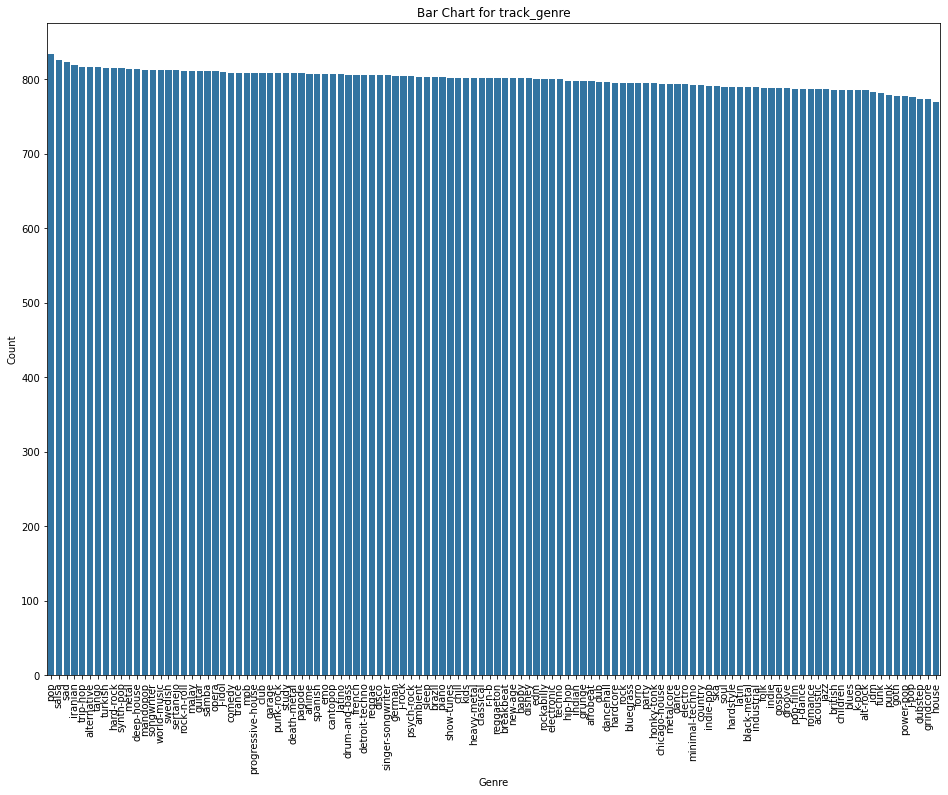

In [33]:
numerical_cols = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 
                  'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
categorical_cols = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']

# Density plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Density Plot for {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()
    
# Plotting for categorical features
for col in categorical_cols:
    if col == 'track_genre':  # Skip 'track_genre' because doing it separately below
        continue
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Bar Chart for {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

    
plt.figure(figsize=(16, 12))
sns.countplot(data=df, x='track_genre', order=df['track_genre'].value_counts().index)
plt.title('Bar Chart for track_genre')
plt.ylabel('Count')
plt.xlabel('Genre')
plt.xticks(rotation=90) 
plt.show()



### Findings

Confirmation of our inital thoughts about the features. 

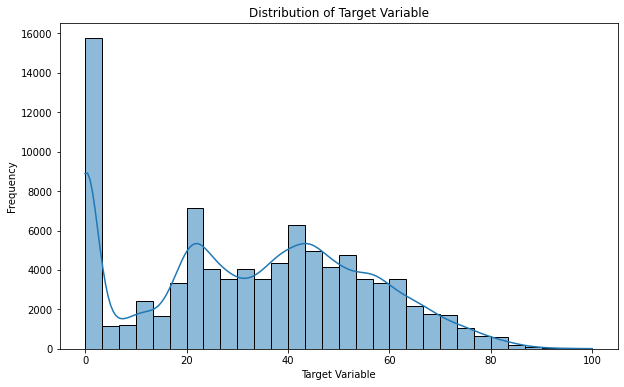

In [51]:
plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], kde=True, bins=30)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Variable')
plt.ylabel('Frequency')

plt.show()

### Findings (in regards to target variable distribution)


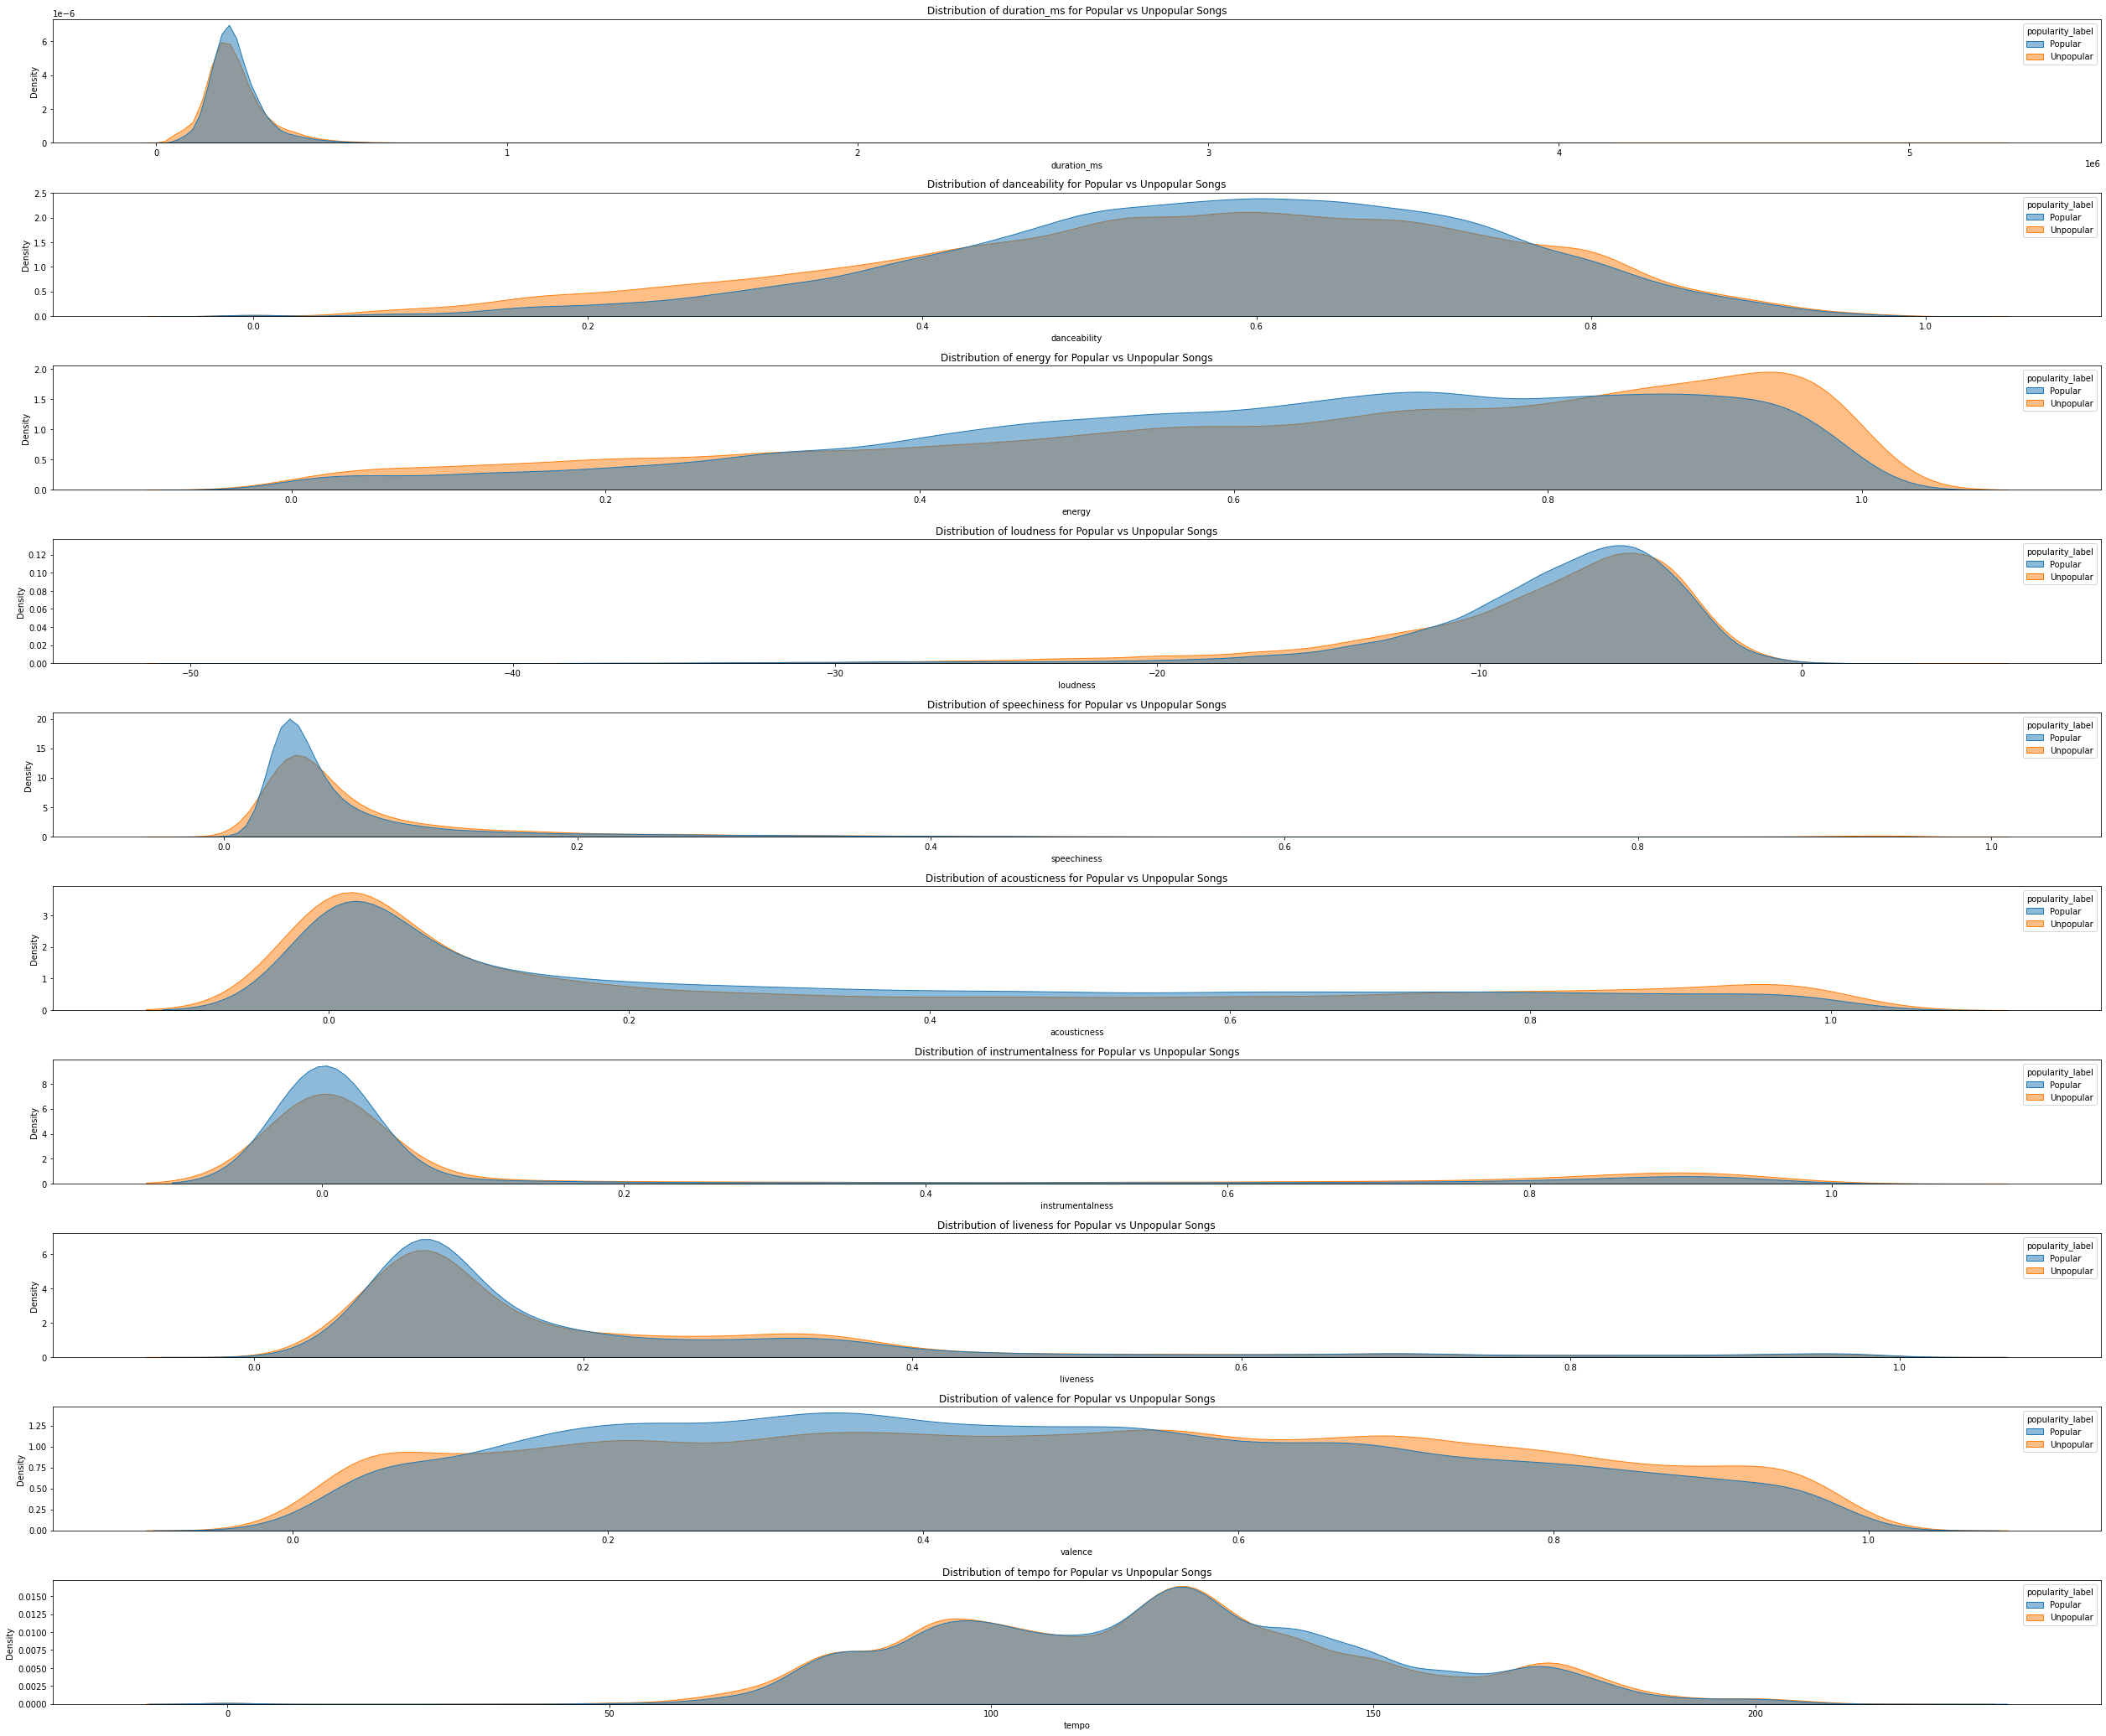

In [56]:
# Setting the threshold for popular or unpopular
popularity_threshold = df['popularity'].median()

# Categorize songs based on the defined threshold
df['popularity_label'] = df['popularity'].apply(lambda x: 'Popular' if x > popularity_threshold else 'Unpopular')

features_to_visualize = numerical_cols

plt.figure(figsize=(35, 30))

for i, feature in enumerate(features_to_visualize, 1):
    plt.subplot(len(features_to_visualize), 1, i)
    sns.kdeplot(data=df, x=feature, hue='popularity_label', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature} for Popular vs Unpopular Songs')
    plt.tight_layout()

plt.subplots_adjust(hspace=0.4, top=0.95)
plt.show()

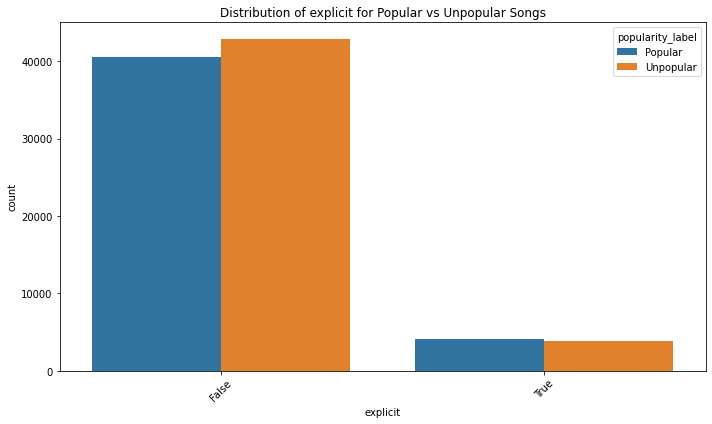

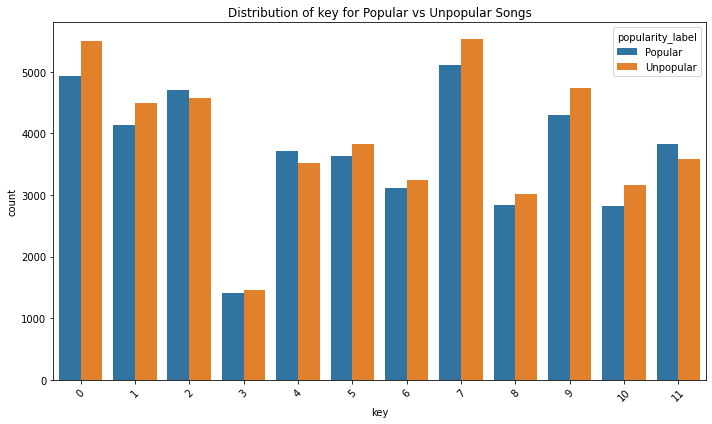

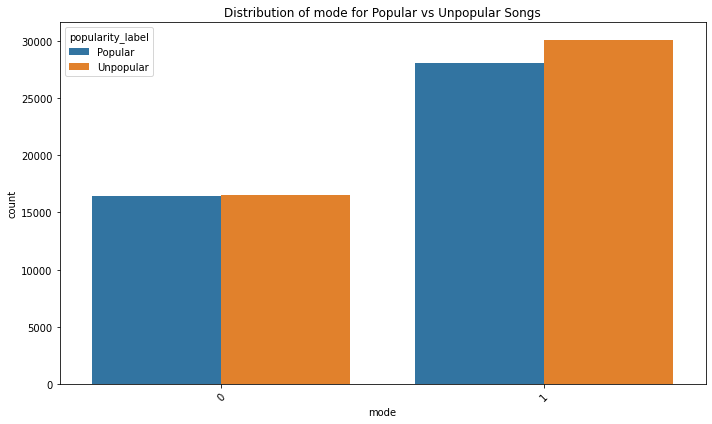

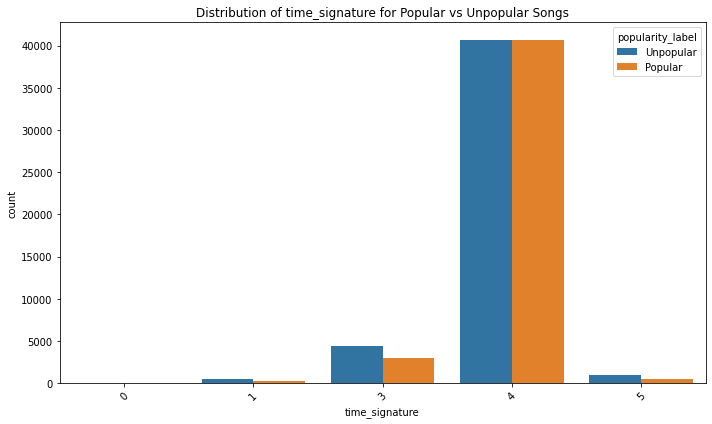

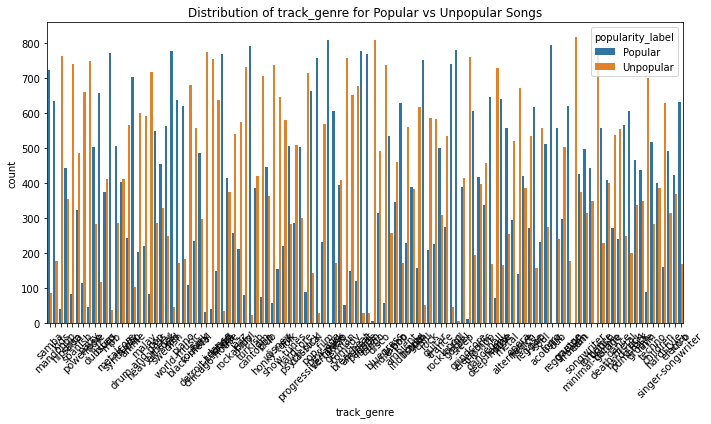

In [57]:
for feature in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature, hue='popularity_label')
    plt.title(f'Distribution of {feature} for Popular vs Unpopular Songs')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

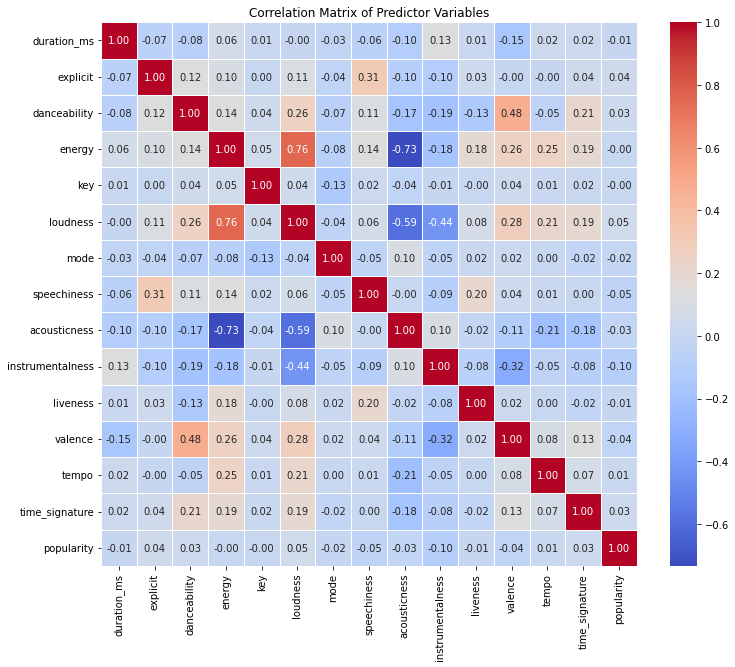

In [47]:
# Correlation matrix

corr_matrix = df[['duration_ms', 'explicit', 'danceability', 'energy', 'key',
                         'loudness', 'mode', 'speechiness', 'acousticness','instrumentalness',
                         'liveness', 'valence', 'tempo', 'time_signature', 'popularity']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Predictor Variables')
plt.show()


### Findings

The predictor variables are moslty indepedent, except for a strong correlation between loudness and energy, and a strong negative correlation between energy and acousticness. Hence, we droped energy to reduce multicollinearity

None of features show very big differences in their distributions for popular vs unpopular songs.

Also artists, album_name and track_name was droped as they wouldn't be interesting to look at as predictive mesurements for what makes a song popular.

## Regression Task 

In [119]:
# Drop columns
df = df.drop(['artists', 'album_name', 'track_name', 'energy'], axis=1)

In [121]:
# Separate features and target variable
X = df.drop('popularity', axis=1)
y = df['popularity']

# Split training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Identifying categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category', 'bool']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing pipeline for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])

df.shape

(91199, 17)

In [146]:
def model_pipeline(model, param_grid, X_train, y_train, X_val, y_val):
    pipe = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
    grid.fit(X_train, y_train)
    
    print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
    print("Test set score: {:.2f}".format(grid.score(X_val, y_val)))
    print("Best parameters:", grid.best_params_)
    
    # predict on validation set and calculate metrics
    y_pred = grid.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f'MSE: {mse}, R^2: {r2}')
    
    return grid


# Ridge Regression
ridge_param_grid = {'model__alpha': [0.01, 0.1, 1, 10, 100]}
model_pipeline(Ridge(), ridge_param_grid, X_train, y_train, X_val, y_val)

# MLPRegressor
mlp_param_grid = {
    'model__hidden_layer_sizes': [(100,), (50, 50)],
    'model__activation': ['tanh', 'relu'],
    'model__alpha': [0.0001, 0.001, 0.01],
    'model__max_iter': [500],
    'model__early_stopping': [True],
}
model_pipeline(MLPRegressor(), mlp_param_grid, X_train, y_train, X_val, y_val)

# RandomForestRegressor
rf_param_grid = {
    'model__n_estimators': [50, 100],
    'model__max_depth': [4, 10],
    'model__min_samples_split': [4, 10]
}
model_pipeline(RandomForestRegressor(), rf_param_grid, X_train, y_train, X_val, y_val)

/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected ver

Best cross-validation accuracy: 0.31
Test set score: 0.30
Best parameters: {'model__alpha': 0.01}
MSE: 0.461328583339828, R^2: 0.3047811861208003
Best cross-validation accuracy: 0.35
Test set score: 0.34
Best parameters: {'model__activation': 'relu', 'model__alpha': 0.01, 'model__early_stopping': True, 'model__hidden_layer_sizes': (100,), 'model__max_iter': 500}
MSE: 0.4350190598310969, R^2: 0.3444294463587604
Best cross-validation accuracy: 0.14
Test set score: 0.12
Best parameters: {'model__max_depth': 10, 'model__min_samples_split': 10, 'model__n_estimators': 50}
MSE: 0.584050096254755, R^2: 0.11984076029999557


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         Index(['ID', 'duration_ms', 'danceability', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         Index(['explicit', 'track_genre'], dtype='object'))])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [4, 10],
                         'model__min_samples_split': [4, 10],
                         'model__n_estimators': [50, 100]})

In [131]:
test_df = pd.read_csv("test.csv")

test_df = test_df.drop(['artists', 'album_name', 'track_name', 'energy'], axis=1)


KeyError: "['artists', 'album_name', 'track_name', 'energy'] not found in axis"

### Test set on best model (regression) 

In [161]:
best_mlp_model = model_pipeline(MLPRegressor(), mlp_param_grid, X_train, y_train, X_val, y_val)

test_predictions = best_mlp_model.predict(test_df)

predictions_df = pd.DataFrame({'ID': test_df['ID'],
    'popularity': test_predictions})

predictions_df.to_csv('submission.csv', index=False)

/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected v

Best cross-validation accuracy: 0.34
Test set score: 0.33
Best parameters: {'model__activation': 'relu', 'model__alpha': 0.01, 'model__early_stopping': True, 'model__hidden_layer_sizes': (100,), 'model__max_iter': 500}
MSE: 0.44177908173487945, R^2: 0.33424214260289675


### Regression metrics and model reflection

Briefly explain how the R2 and MSE metrics work - What do they calculate?
The R2 metric calculates the proportion of the variance in dependent variable that is being explained by the independent variable. The dependent variable represents the variable being predicted, and the independent variable represents the variables used for prediction. The result can range from 0 to 1. Here, 0 means that the model does not explain any of the variability of the dependent variable around its mean, and 1 entail that the model fits perfectly and can predict the dependent variable based on the independent variable. 
The Mean Squared Error calculates the average of the squared differences between the predicted and actual values for each data point. Here, a lower value represents a better model because it indicates smaller deviations between the predicted and actual values.
The two metrics provide different interpretations of the ML models, because R2 is a relative measure providing the proportion of variance explained by the model, whereas MSE is an absolute measure of the error between predicted and actual values. 




Explain which model is the best and reflect on why you think that is.
In task 2, we choose three Regression models: Ridge Regression, Multi-layer Perceptron Regression, and Random Forest Regressor. We apply GridSearchCV for hyperparameter tuning, as it is an effective cross-validation technique because it search through all possible combinations of hyperparameters based on the given grid in the code. The outcome is that the MLP Regression is the best performing model, due to the highest cross-validation accuracy, test score and R2 score, and lowest MSE score (lower MSE score, the better). Better performance might be due to its ability to model complex task and non-linear relationships compared to the other models. 

Then, we apply the test set on the MLP model, which result in that all evaluation metrics worsen slightly. 


## Classification Task 

In [133]:
# Creatinh popularity_category column
df['popularity_category'] = pd.qcut(df['popularity'], q=3, labels=False)

# Drop popularity column
X = df.drop(['popularity', 'popularity_category'], axis=1)
y = df['popularity_category']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [144]:
# Classification models
models = {
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(),
    'MLPClassifier': MLPClassifier()
}

# Hyperparameter grids for each model
param_grids = {
    'LogisticRegression': {'model__C': [0.01, 0.1, 1, 10, 100], 'model__max_iter': [1000]},
    'DecisionTree': {'model__max_depth': [None, 10, 20, 30], 'model__min_samples_split': [2, 4, 10]},
    'MLPClassifier': {'model__hidden_layer_sizes': [(100,), (50, 50)], 'model__alpha': [0.0001, 0.001, 0.01],
                      'model__activation': ['tanh', 'relu'], 'model__max_iter': [500],
                     'model__early_stopping': [True]}
}


In [145]:
# Preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
])


def train_evaluate_model(model_name, model, param_grid, X_train, y_train, X_val, y_val):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', model)])
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")
    y_pred = grid_search.predict(X_val)
    print(f"Classification Report for {model_name}:\n{classification_report(y_val, y_pred)}")

# Train and evaluate the models
for model_name, model in models.items():
    train_evaluate_model(model_name, model, param_grids[model_name], X_train, y_train, X_val, y_val)


/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected v

/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/antonaursnes/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mo

Best parameters for LogisticRegression: {'model__C': 100, 'model__max_iter': 1000}
Classification Report for LogisticRegression:
              precision    recall  f1-score   support

           0       0.66      0.60      0.63      6252
           1       0.60      0.64      0.62      6128
           2       0.61      0.61      0.61      5860

    accuracy                           0.62     18240
   macro avg       0.62      0.62      0.62     18240
weighted avg       0.62      0.62      0.62     18240

Best parameters for DecisionTree: {'model__max_depth': None, 'model__min_samples_split': 10}
Classification Report for DecisionTree:
              precision    recall  f1-score   support

           0       0.77      0.80      0.78      6252
           1       0.70      0.70      0.70      6128
           2       0.67      0.65      0.66      5860

    accuracy                           0.72     18240
   macro avg       0.71      0.71      0.71     18240
weighted avg       0.71      0.

### Classification metrics and model reflection

Briefly explain how the F1 and accuracy metrics work - What do they calculate?
The accuracy metric calculate the ratio of the number of correctly predicted instances to the total number of instances. The F1 metric takes the harmonic mean of the precision and recall scores. Here, the precision score is the proportion of true positive predictions among all positive predictions, and the recall score measures the proportion of true positive predictions among all actual positive instances. The difference between the accuracy and F1 metrics is that accuracy do not consider the balance between false negative and false positive predictions, whilst the F1 metric consider both.  


Explain which model/algorithm is the best and reflect on why you think that is.
In task 3, we apply the three classification models: Logistic Regression, Decision Tree and Multilayer Perceptron Classifier. Each model is tuned with GridSearchCV, for the same reason as explained in the regression task. Based on the accuracy score, the Decision Tree model is the best performing with a 0.72 score. This means that overall, this model is making more accurate predictions. Then, looking at the F1 score, the Decision Tree model is the best performing model again. For all classes, the model achieve the highest scores, meaning it balances the precision and recall scores. The better performance could be because it is better at handling irrelevant features, and also if the decision boundaries are not linear. But could also be because of overfitting.